In [1]:
%matplotlib inline
%matplotlib inline
%config InlineBackend.figure_format = "retina"
%load_ext autoreload
%autoreload 2
from pyslime import slime
from pyslime import utils as pu
import numpy as np

from pyslime import utils as pu
import pyslime.pipeline.pipelineUtils as ppu

from importlib import reload
from matplotlib import pyplot as plt

bpslime_dir = '/Volumes/GoogleDrive/My Drive/SlimeMold/2021-10-12/BP_z=0_float32'
bpslime_datafile='trace _BP_z=0_float32.bin'
sdss_slime_dir = '/Volumes/GoogleDrive/.shortcut-targets-by-id/15147DgF0hJIq6mak7En23k0fNukBp6RO/2021-10-18/SDSS_z=0.1_float32_rerouting-to-data'
sdss_datafile = 'trace.bin'

In [2]:
sdss_slime32 = pu.get_slime(sdss_slime_dir, datafile=sdss_datafile, dtype=np.float32, standardize=False)
# bpslime32 = pu.get_slime(bpslime_dir, datafile=bpslime_datafile, dtype=np.float32, standardize=False)

data = sdss_slime32.data
ymin = 0
ymax = data.shape[0]
xmin = 0
xmax = data.shape[1]
zmin = 200
zmax = 250
slicedata = data[ymin:ymax, xmin:xmax, zmin:zmax]

# flatbpslime = bpslime32.data.flatten()
flatsdssslime = slicedata.flatten()

(624, 1024, 608) (0, 1, 2)
(608, 1024, 624)


/Users/mwilde/python/pyslime/pyslime/utils.py:328: RuntimeWarning: divide by zero encountered in log10
  bpslime.data = np.log10(bpslime.data)


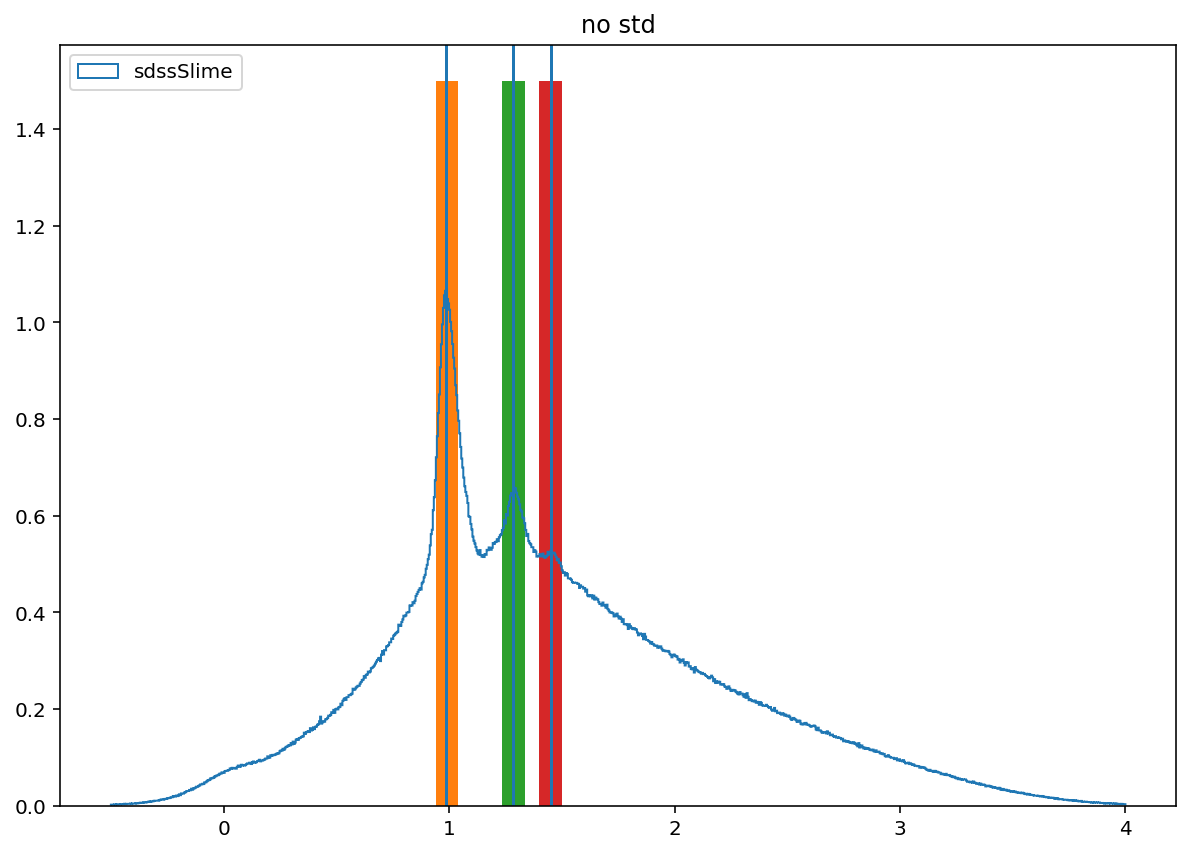

In [3]:
delta = 0.05
peaks = np.array([0.99, 1.285, 1.45])# , 1.565])

def densplot(fig, ax):
    bins = np.linspace(-0.5, 4, 1000)
    kwargs = {"bins":bins, "histtype":"step", "density":True}
    # plt.axvline()
    # plt.hist(flatbpslime[::50], **kwargs, label="bpSlime")
    plt.hist(flatsdssslime[::1], **kwargs, label="sdssSlime")


    
    plt.axvline(0.985)
    plt.fill_betweenx([0,1.5], peaks[0]-delta, peaks[0]+delta)
    plt.axvline(1.285)
    plt.fill_betweenx([0,1.5], peaks[1]-delta, peaks[1]+delta)
    plt.axvline(1.45)
    plt.fill_betweenx([0,1.5], peaks[2]-delta, peaks[2]+delta)
    #plt.axvline(1.565)
    # plt.fill_betweenx([0,1.5], peaks[3]-delta, peaks[3]+delta)

    plt.legend(loc='upper left')
    plt.title("no std");
    return fig, ax

[ 9.77237221 19.27524913 28.18382931]


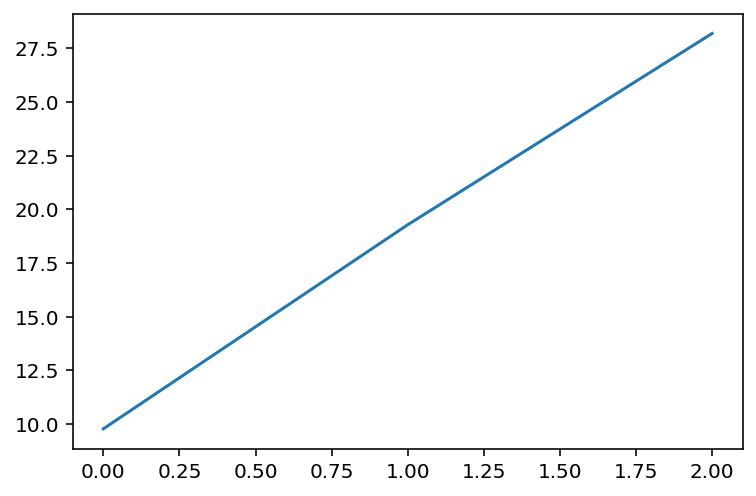

In [4]:
print(10**peaks)
plt.plot(10**peaks);

In [5]:
sldat = sdss_slime32.copy()

In [6]:
# slicedata = data[ymin:ymax, xmin:xmax, zmin:zmax]
# slicepeak1 = slicedata[(slicedata > peaks[0]-delta) & (slicedata < peaks[0]+delta)]
#slicepeak2 = slicedata[(slicedata > peaks[1]-delta) & (slicedata < peaks[1]+delta)]
#slicepeak3 = slicedata[(slicedata > peaks[2]-delta) & (slicedata < peaks[2]+delta)]

In [33]:
smashslice = np.sum(10**slicedata, axis=2)


cond1 = (slicedata  > (peaks[0]-delta)) & (slicedata < (peaks[0]+delta))
smashslice_peak1 = np.where(cond1, slicedata, -np.inf)
smashslice_peak1 = np.sum(10**smashslice_peak1, axis=2)

cond2 = (slicedata  > (peaks[1]-delta)) & (slicedata < (peaks[1]+delta))
smashslice_peak2 = np.where(cond2, slicedata, -np.inf)
smashslice_peak2 = np.sum(10**smashslice_peak2, axis=2)

cond3 = (slicedata  > (peaks[2]-delta)) & (slicedata < (peaks[2]+delta))
smashslice_peak3 = np.where(cond3, slicedata, -np.inf)
smashslice_peak3 = np.sum(10**smashslice_peak3, axis=2)

xbad, ybad, zbad = np.where((slicedata  > (peaks[0]-delta)) & (slicedata < (peaks[0]+delta)))
xbad2, ybad2, zbad2 = np.where((slicedata  > (peaks[1]-delta)) & (slicedata < (peaks[1]+delta)))
xbad3, ybad3, zbad3 = np.where((slicedata  > (peaks[2]-delta)) & (slicedata < (peaks[2]+delta)))


# only pick out peaks in the thin slice
peak1x, peak1y = ybad[(zbad> zmin) & (zbad < zmax)], xbad[(zbad > zmin) & (zbad < zmax)]
peak2x, peak2y = ybad2[(zbad2 > zmin) & (zbad2 < zmax)], xbad2[(zbad2 > zmin) & (zbad2 < zmax)]
peak3x, peak3y = ybad3[(zbad3 > zmin) & (zbad3 < zmax)], xbad3[(zbad3 > zmin) & (zbad3 < zmax)]

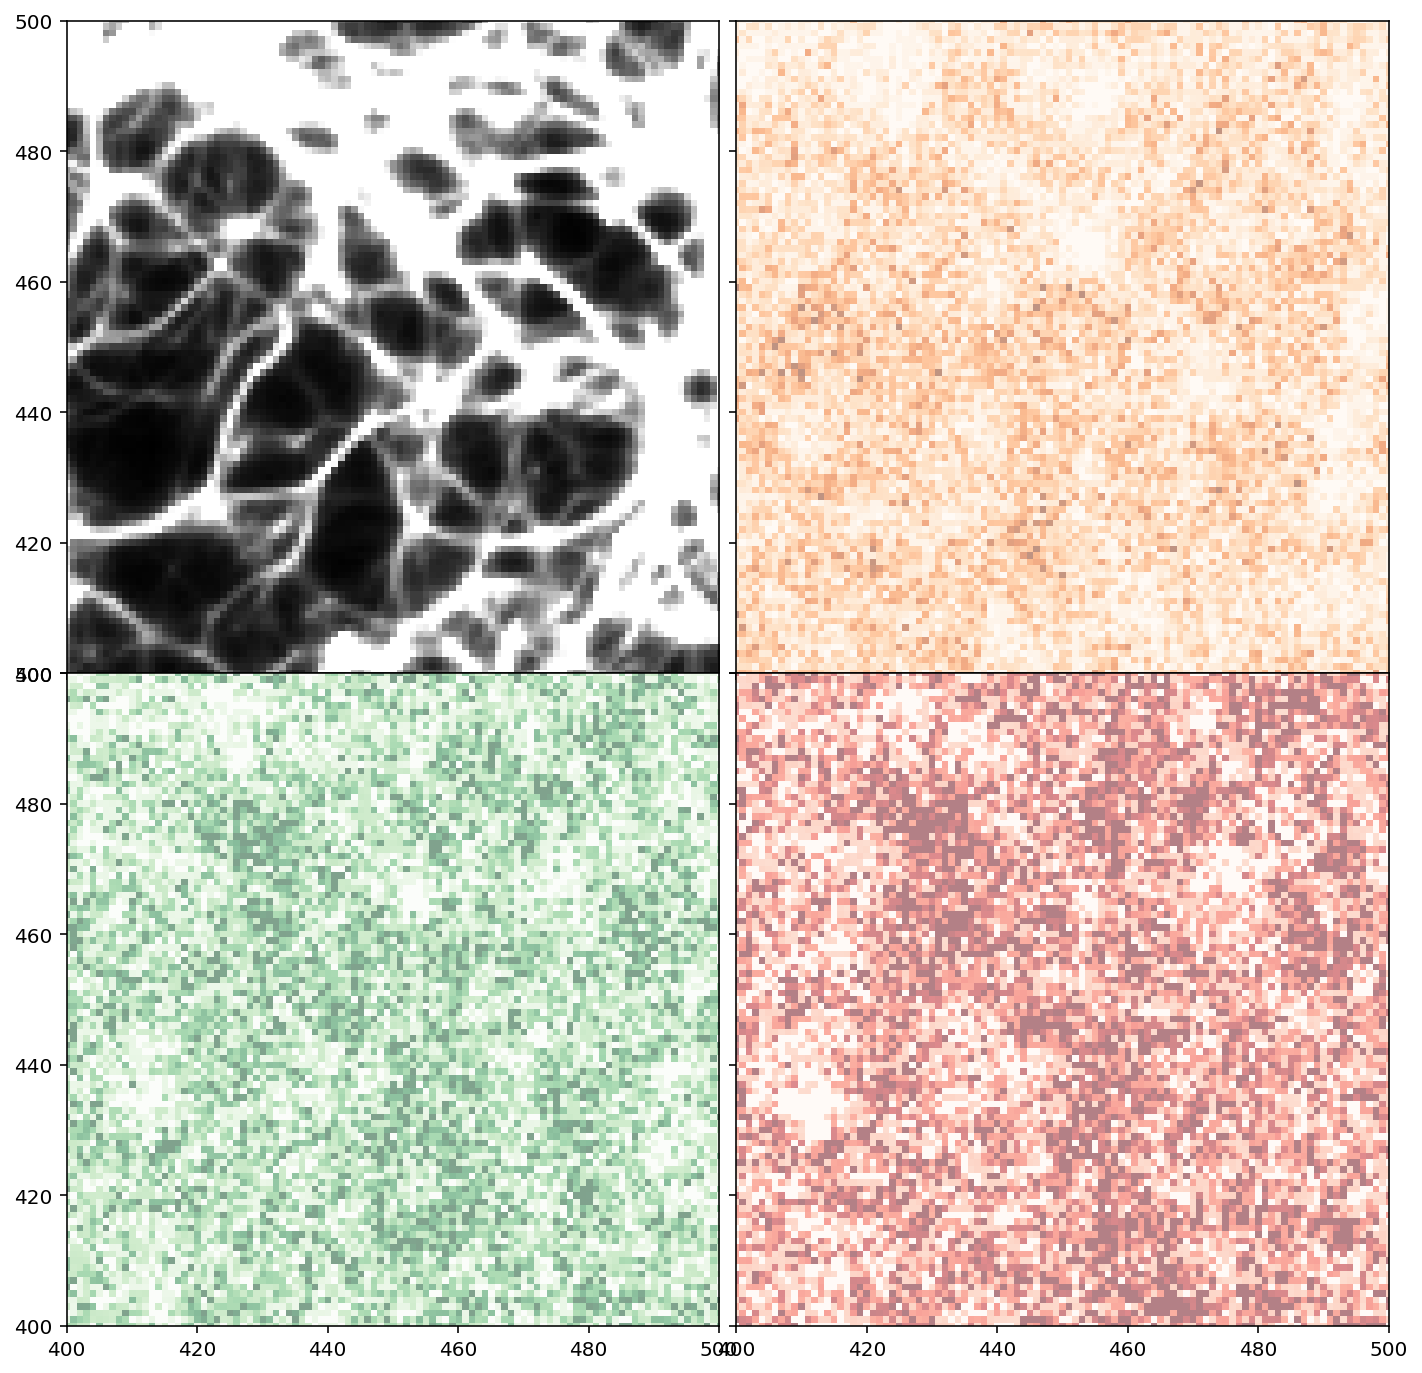

In [39]:

kwargs = {'s':0.001, 'alpha':1}

xmin = 400
xmax = 500

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(12,12), sharex=True, sharey=True)
axes[0,0].imshow(smashslice, origin='lower', cmap='gray', vmin=0, vmax=10000)
axes[0,0].set_xlim(xmin, xmax)
axes[0,0].set_ylim(xmin, xmax)
axes[0,1].imshow(smashslice_peak1, origin='lower', cmap='Oranges', vmin=1, vmax=100, alpha=0.5)
axes[0,1].set_xlim(xmin, xmax)
axes[0,1].set_ylim(xmin, xmax)
axes[1,0].imshow(smashslice_peak2, origin='lower', cmap='Greens', vmin=1, vmax=100, alpha=0.5)
axes[1,0].set_xlim(xmin, xmax)
axes[1,0].set_ylim(xmin, xmax)
axes[1,1].imshow(smashslice_peak3, origin='lower', cmap='Reds', vmin=1, vmax=100, alpha=0.5)
axes[1,1].set_xlim(xmin, xmax)
axes[1,1].set_ylim(xmin, xmax)
# plt.scatter(peak1x, peak1y, **kwargs);
# plt.scatter(peak2x, peak2y, **kwargs);
# plt.scatter(peak3x, peak3y, **kwargs);
#plt.xlim(ymin, ymax)
#plt.ylim(xmin, xmax);
plt.subplots_adjust(hspace=0, wspace=0)

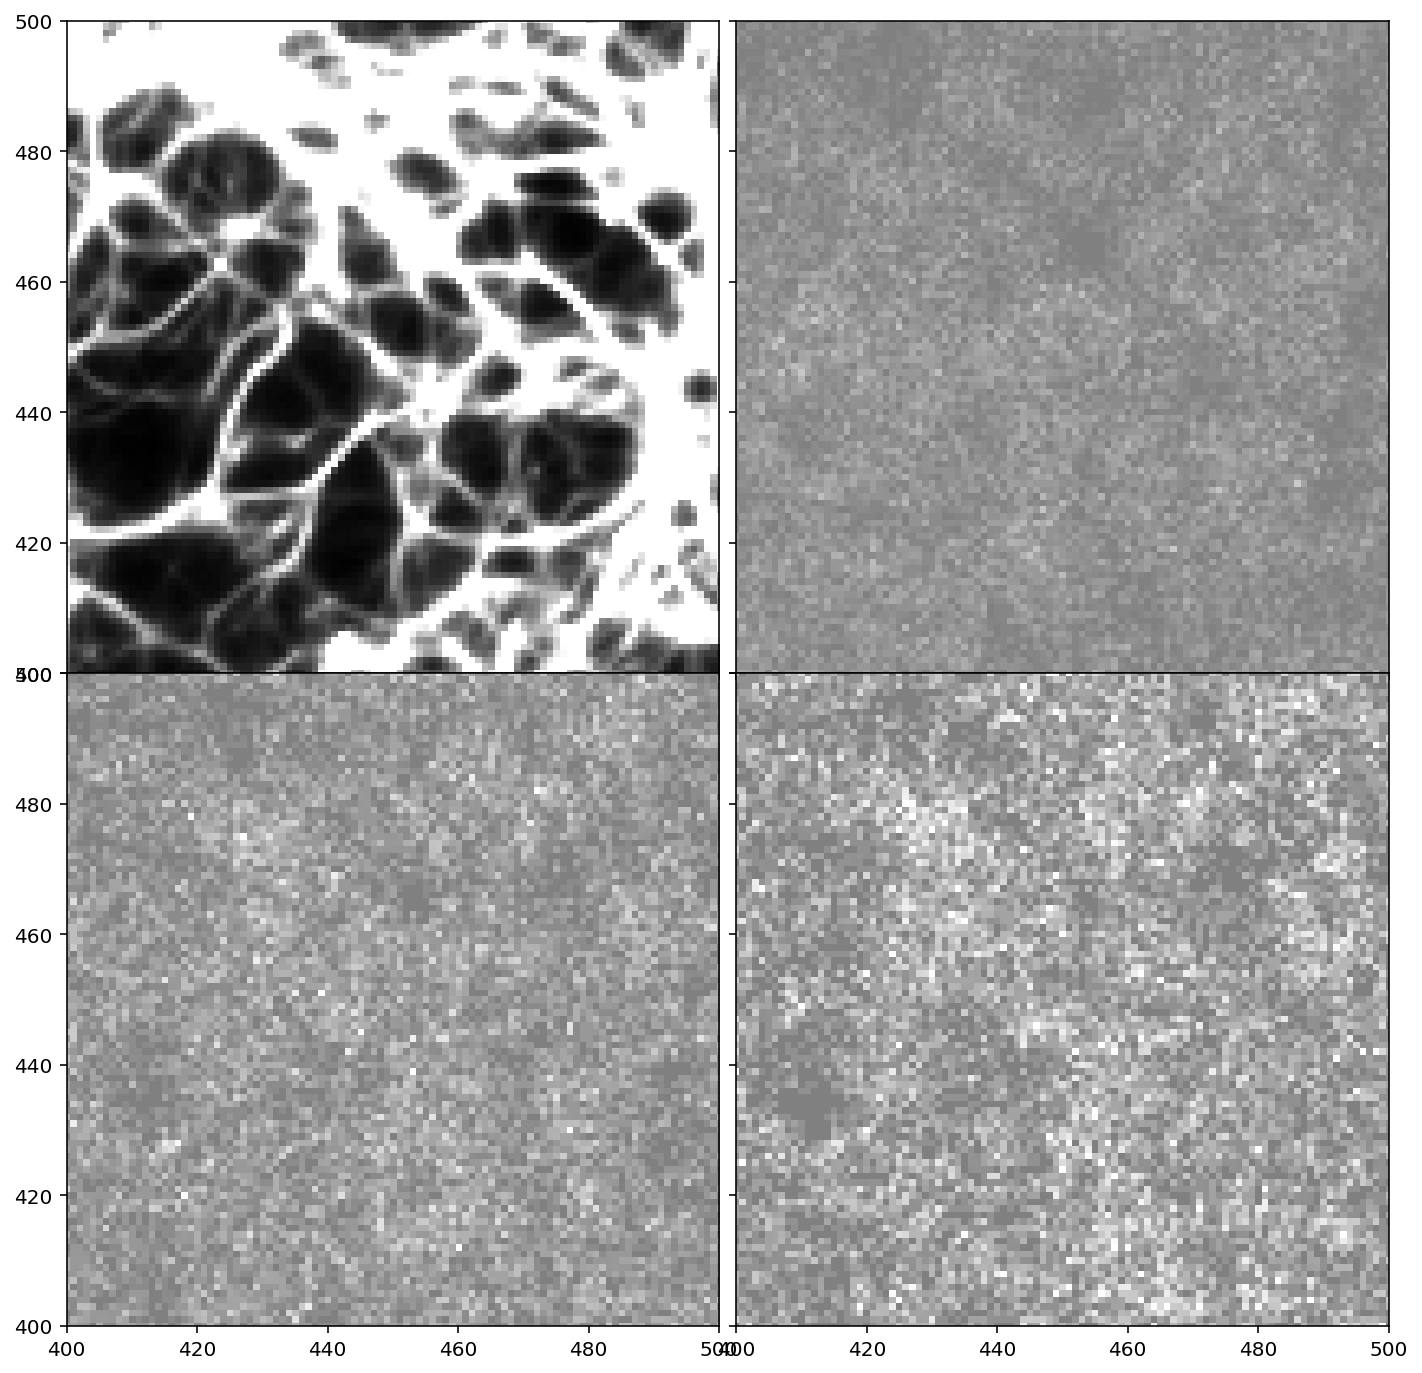

In [41]:
kwargs = {'s':0.001, 'alpha':1}

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(12,12), sharex=True, sharey=True)
axes[0,0].imshow(smashslice, origin='lower', cmap='gray', vmin=0, vmax=10000)
axes[0,0].set_xlim(xmin, xmax)
axes[0,0].set_ylim(xmin, xmax)
axes[0,1].imshow(smashslice_peak1, origin='lower', cmap='gray', vmin=1, vmax=10000/50, alpha=0.5)
axes[0,1].set_xlim(xmin, xmax)
axes[0,1].set_ylim(xmin, xmax)
axes[1,0].imshow(smashslice_peak2, origin='lower', cmap='gray', vmin=1, vmax=10000/50, alpha=0.5)
axes[1,0].set_xlim(xmin, xmax)
axes[1,0].set_ylim(xmin, xmax)
axes[1,1].imshow(smashslice_peak3, origin='lower', cmap='gray', vmin=1, vmax=10000/50, alpha=0.5)
axes[1,1].set_xlim(xmin, xmax)
axes[1,1].set_ylim(xmin, xmax)
# plt.scatter(peak1x, peak1y, **kwargs);
# plt.scatter(peak2x, peak2y, **kwargs);
# plt.scatter(peak3x, peak3y, **kwargs);
#plt.xlim(ymin, ymax)
#plt.ylim(xmin, xmax);
plt.subplots_adjust(hspace=0, wspace=0)

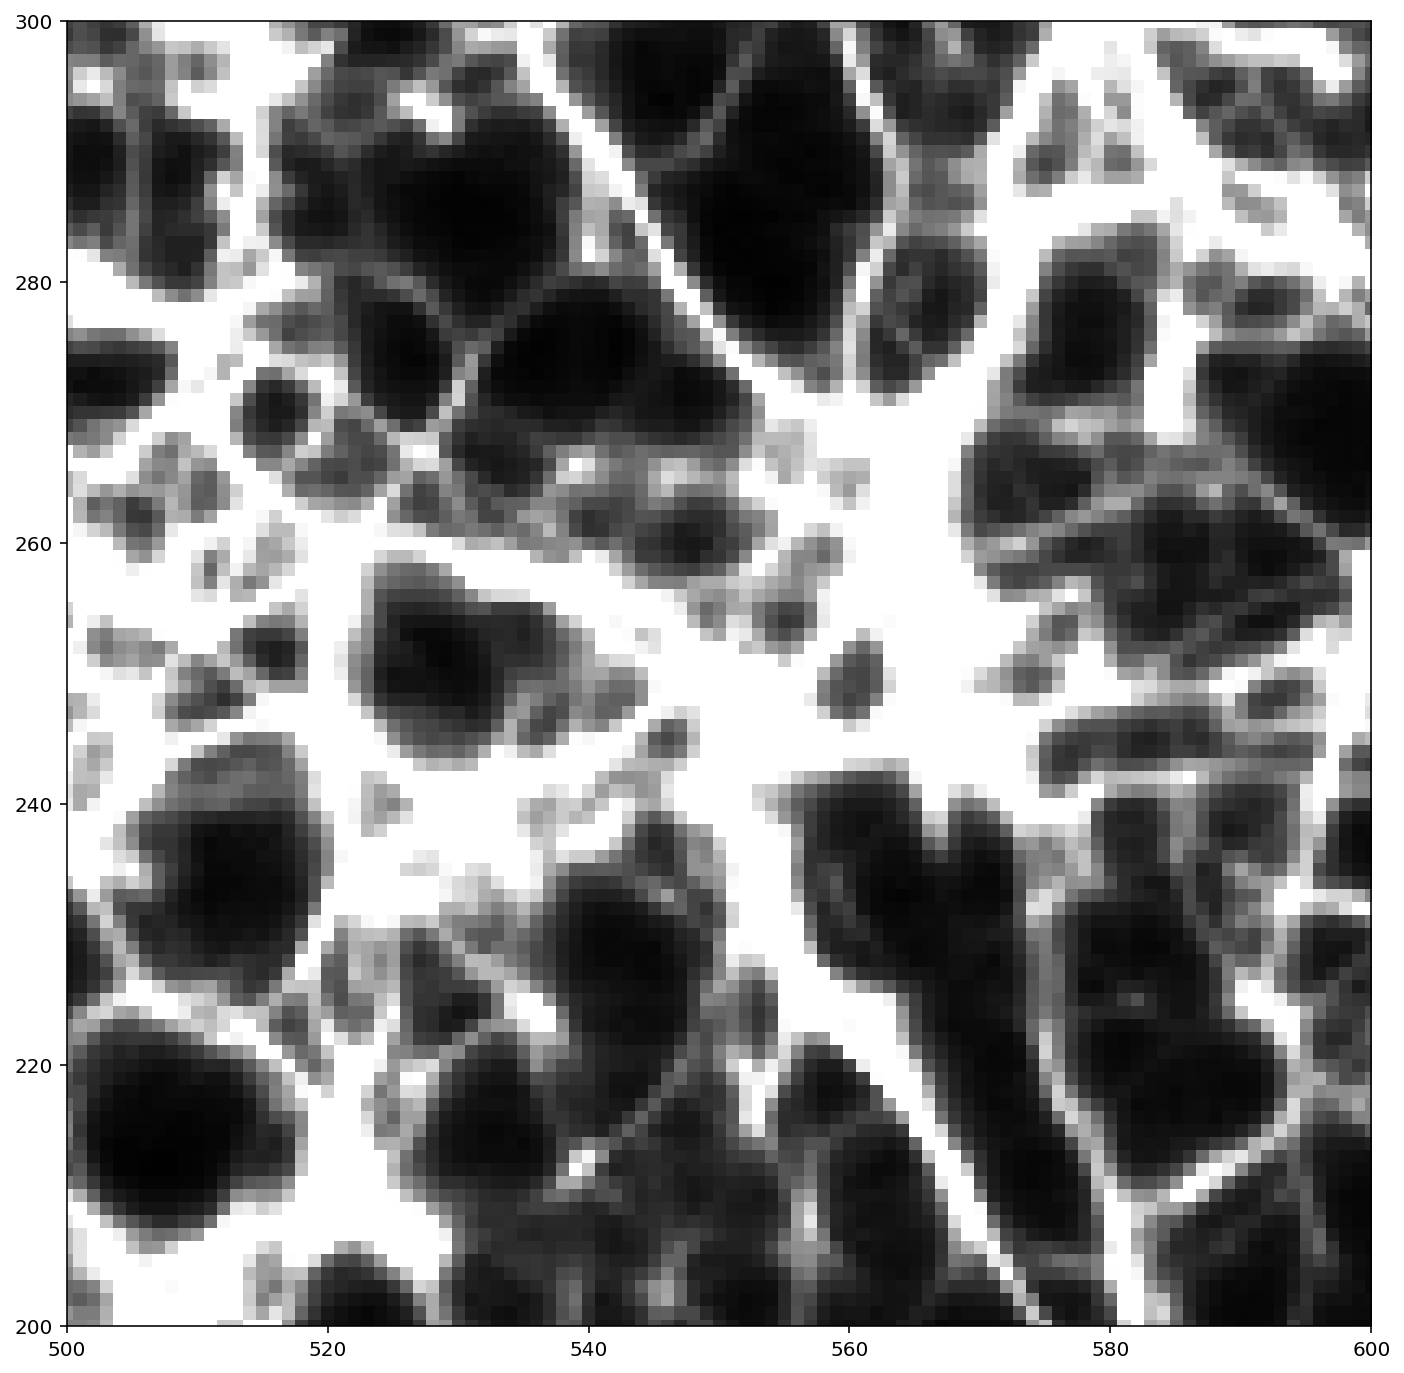

In [36]:
kwargs = {'s':1, 'alpha':1}

plt.figure(figsize=(12,12))
plt.imshow(smashslice, origin='lower', cmap='gray', vmin=0, vmax=10000)
#plt.imshow(smashslice_peak1, origin='lower', cmap='Greens', vmin=1, vmax=100, alpha=0.5)
#plt.imshow(smashslice_peak2, origin='lower', cmap='Blues', vmin=1, vmax=100, alpha=0.5)
plt.scatter(peak1x, peak1y, **kwargs);
plt.scatter(peak2x, peak2y, **kwargs);
plt.scatter(peak3x, peak3y, **kwargs);
plt.xlim(xmax, 600)
plt.ylim(200, 300);

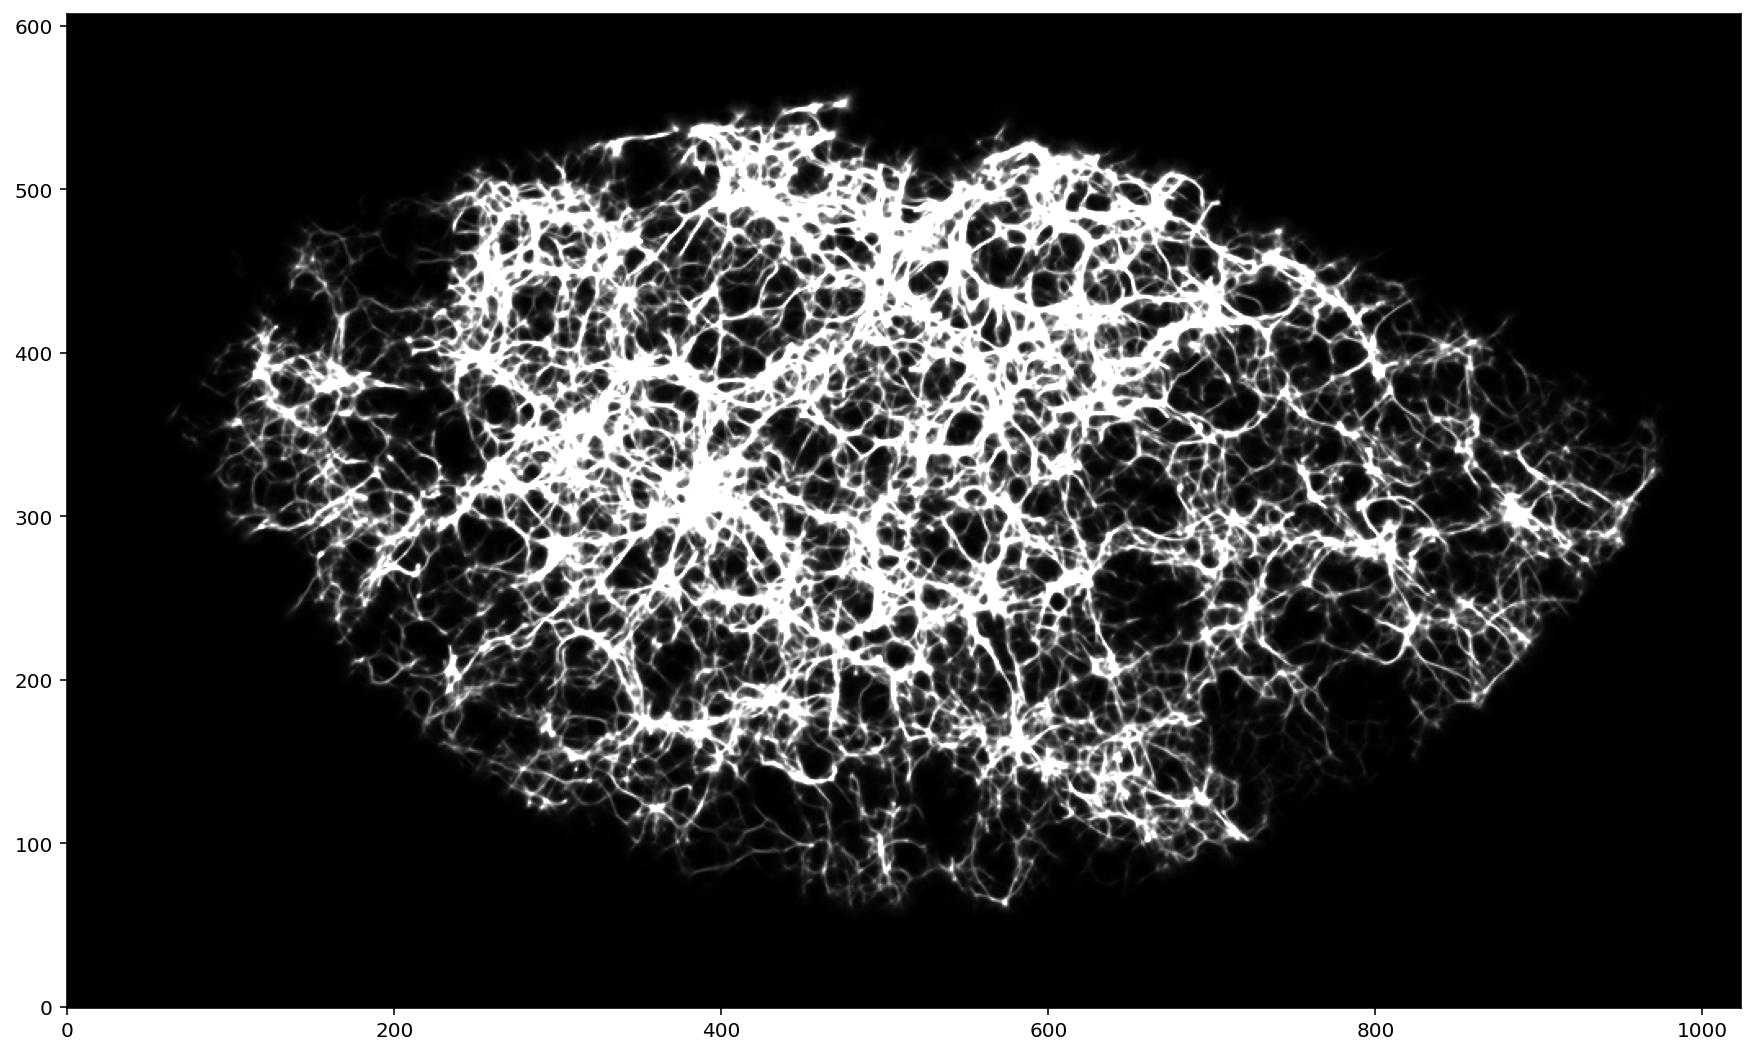

In [37]:
plt.figure(figsize=(15,15))
plt.imshow(smashslice, origin='lower', cmap='gray', vmin=0, vmax=10000)